'''

@Author: Jayesh Patil

@Date: 11-11-2024

@Title: Simple Linear Regression

'''

Problem :- Build a predictive linear regression model for given dataset, given humidity
predict apparent temperature

Importing libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [4]:
df = pd.read_csv('weatherHistory.csv')

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Analysing Dataset

In [6]:
x = df['Humidity']
y = df['Apparent Temperature (C)']
print(x.head())
print(y.head())

0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64
0    7.388889
1    7.227778
2    9.377778
3    5.944444
4    6.977778
Name: Apparent Temperature (C), dtype: float64


In [7]:
print(x.describe())
print(y.describe())
print("null values in x ",x.isna().sum())
print("null values in y ",y.isna().sum())

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64
count    96453.000000
mean        10.855029
std         10.696847
min        -27.716667
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent Temperature (C), dtype: float64
null values in x  0
null values in y  0


In [8]:
print("Shape of x :",x.shape)
print("Shape of y :",y.shape)

Shape of x : (96453,)
Shape of y : (96453,)


Visualizing Dataset

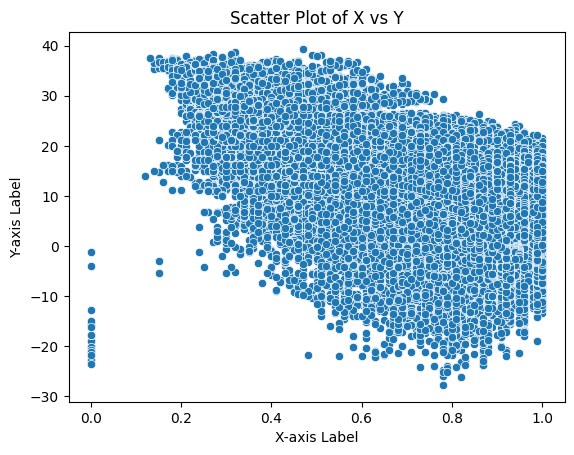

In [9]:
sns.scatterplot(x=x, y=y)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatter Plot of X vs Y")
plt.show()

Check outliers

<Axes: ylabel='Apparent Temperature (C)'>

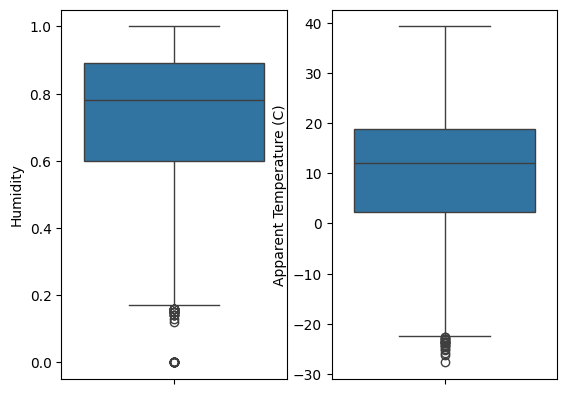

In [10]:
plt.subplot(1,2,1)
sns.boxplot(data=x)
plt.subplot(1,2,2)
sns.boxplot(data=y)

Remove outliers

In [15]:
# Creating the DataFrame
data = pd.DataFrame({'Humidity': x, 'Apparent Temperature (C)': y})

# Calculating IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on IQR
data_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Splitting the cleaned dataset into features and target variable
x_clean = data_no_outliers['Humidity'].values.reshape(-1, 1)
y_clean = data_no_outliers['Apparent Temperature (C)'].values


<Axes: >

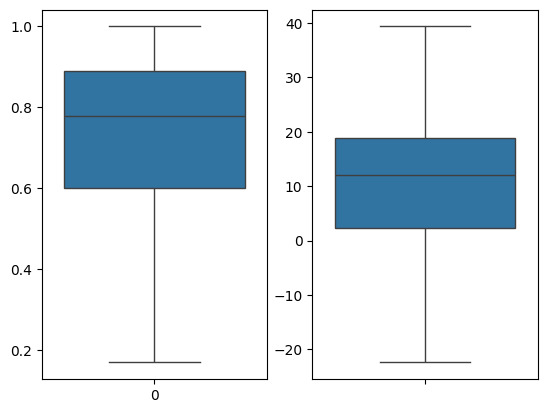

In [17]:
plt.subplot(1,2,1)
sns.boxplot(data= x_clean)
plt.subplot(1,2,2)
sns.boxplot(data= y_clean)


Spliting Dataset

In [18]:
# Assuming X_clean and y_clean are your features and target variable after outlier removal

# Splitting the data (e.g., 80% training and 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training set X:", x_train.shape)
print("Training set y:", y_train.shape)
print("Testing set X:", x_test.shape)
print("Testing set y:", y_test.shape)


Training set X: (77111, 1)
Training set y: (77111,)
Testing set X: (19278, 1)
Testing set y: (19278,)


Scaling Data Set

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Model Selection

In [20]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

Model Performance

In [25]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error :{mse}')
print(f'R^2 score : {r2}')

Mean Squared Error :72.06911000865391
R^2 score : 0.3674055968652362


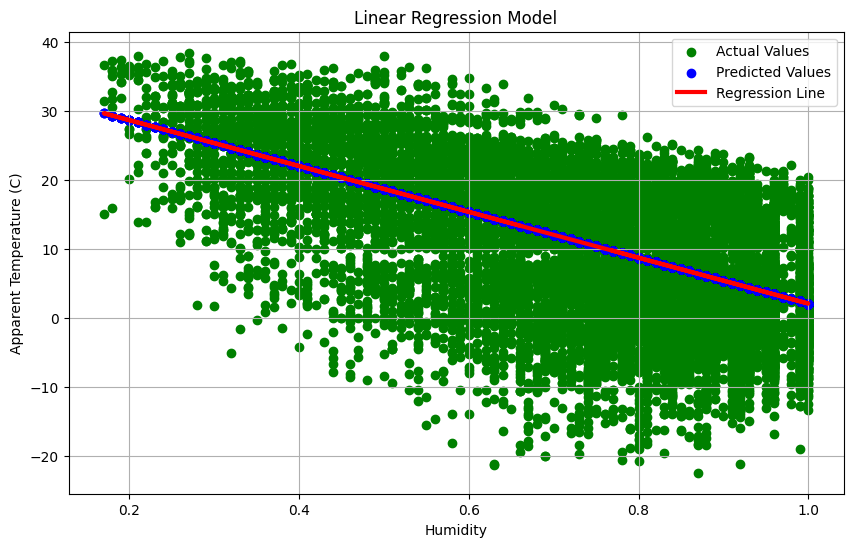

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test , color= 'g' ,label = 'Actual Values')
plt.scatter(x_test, y_pred , color= 'b' ,label = 'Predicted Values')
plt.plot(x_test, y_pred, color='r', linewidth=3, label='Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.grid()
plt.show()